In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\valer\AppData\Local\Temp\ipykernel_21872\466098584.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
df = pd.read_csv('data/data_preprocessed.csv')
df.head(5)

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg,product
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,0.0,NaN,NaN,2,0,1.0,0,0,Credits
1,342841087,40.0,0.0,town,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,82.0,NaN,NaN,4,0,0.0,1,0,Credits
2,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,1,NaN,0,0,Credits
3,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0,NaN,0,0,Credits
4,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,0.0,NaN,NaN,4,0,1.0,1,0,Credits


In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

In [11]:
df_filter = df[(df['age'] >= 14) & (df['age'] <= upper_bound)]
df_filter[df_filter['product'] == 'Credit'] = df_filter[df_filter['age'] >= 18]

C:\Users\valer\AppData\Local\Temp\ipykernel_21872\4268171240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[df_filter['product'] == 'Credit'] = df_filter[df_filter['age'] >= 18]


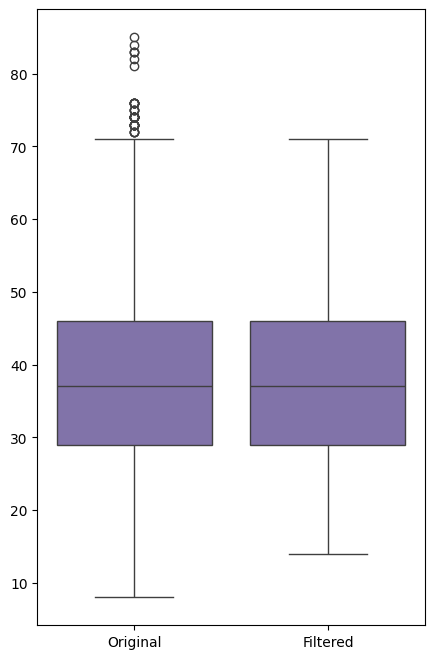

In [14]:
df_combined = pd.DataFrame({
    'Original': df['age'],
    'Filtered': df_filter['age']
})

# Создаем боксплот
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_combined, color='#7C6AB2')

# Убираем подписи осей
plt.xlabel('')
plt.ylabel('')

# Показываем график
plt.title('')
plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()